In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishita7480","key":"f400b0147c1185f2579bd679095f5a66"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 775MB/s]


In [8]:
#import zipfile
import pandas as pd
#import os

# # Unzip the downloaded file
# # The name of the downloaded zip file is usually the dataset name + '.zip'
# with zipfile.ZipFile('housedata.zip', 'r') as zip_ref:
#     zip_ref.extractall('.')

# # List the extracted files to find the CSV
# print(os.listdir('.'))

# Load the data into a pandas DataFrame
df = pd.read_csv('F:\Projects\HousePricePrediction\Data\data.csv') # Adjust filename as per extracted files
display(df.head())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
df_output = pd.read_csv('F:\Projects\HousePricePrediction\Data\output.csv')
display(df_output.head())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [11]:
rows, col = df.shape


In [12]:
rows, col

(4600, 18)

Target Variable = Price

Rows = 4600, columns = 18

Numerical columns = 11
categorical feature = 1
date-time = 1
text = 4

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [14]:
y = df['price']
X = df.drop('price', axis=1)

In [15]:
#Dropping street because it is unique for almost every house and country because it is same, street is too specific(bad for generalization) and
# country is constant (add zero info) so they'll not help learning patterns
X = X.drop(columns=['street', 'country'])

In [16]:
X["date"].head()

0    2014-05-02 00:00:00
1    2014-05-02 00:00:00
2    2014-05-02 00:00:00
3    2014-05-02 00:00:00
4    2014-05-02 00:00:00
Name: date, dtype: object

In [17]:
X['date'] = pd.to_datetime(X['date'])

In [18]:
X['date'].dtype

dtype('<M8[ns]')

In [19]:
X['date'].head()

0   2014-05-02
1   2014-05-02
2   2014-05-02
3   2014-05-02
4   2014-05-02
Name: date, dtype: datetime64[ns]

Linear models need numeric features where “+1” has real meaning.
Raw date strings (or encoded timestamps) don’t represent meaningful, linear distances in time.
Treating dates as numbers makes the model learn fake relationships.
Extracting higher-level signals (like year) captures real trends while removing noise.

In [20]:
X['sale_year'] = X['date'].dt.year

In [21]:
X = X.drop(columns=['date'])

In [22]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,sale_year
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,2014
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,2014
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,2014
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,2014
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,2014


In [23]:
X.isnull().sum().sort_values(ascending=False)

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
sale_year        0
dtype: int64

In [26]:
categorical_columns = X.select_dtypes(include=['object', 'category']).nunique()
numerical_columns = X.select_dtypes(include=['number']).nunique()

categorical_columns, numerical_columns

(city        44
 statezip    77
 dtype: int64,
 bedrooms           10
 bathrooms          26
 sqft_living       566
 sqft_lot         3113
 floors              6
 waterfront          2
 view                5
 condition           5
 sqft_above        511
 sqft_basement     207
 yr_built          115
 yr_renovated       60
 sale_year           1
 dtype: int64)

We are going to use One-hot encoding for the categorical columns, giving numerical values like 1/2/3/.. to each distinct value in each column might give a false impression to the model that one city or one statezip having higher value is more important that the others in the column, that's why using one hot encoding , for eg:

Seattle --> is_seattle=1 is_California=0 is_Redmond=0

In [27]:
X_encoded = pd.get_dummies(X, 
                columns=categorical_columns.index.tolist(), 
                drop_first=True)

In [28]:
X_encoded.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,...,0,0,0,0,0,0,0,0,0,0


### Why `drop_first=True` is Important

When we use `pd.get_dummies()` to one-hot encode categorical variables, it creates a new column for each unique category. For example, if a column has three categories: `A`, `B`, and `C`, it will create three new columns: `A`, `B`, and `C`, with binary values (0 or 1) indicating the presence of each category.

#### The Problem with Including All Categories
If we include all three columns (`A`, `B`, and `C`), there is a **perfect linear dependency** between them:

\[
A + B + C = 1
\]

This is called **perfect multicollinearity**, and it causes problems for certain machine learning models, like linear regression. These models rely on matrix inversion to calculate coefficients, and perfect multicollinearity makes the matrix non-invertible, leading to computational issues.

#### How `drop_first=True` Solves This
By setting `drop_first=True`, we drop the first category (e.g., `A`). This removes the redundancy, as the dropped category can still be inferred from the remaining columns. For example:
- If `B=0` and `C=0`, then `A` must be `1`.

This ensures that the feature matrix is no longer singular, allowing the model to compute coefficients properly.

#### Key Takeaway
- Including all categories creates **redundancy** and causes **computational issues** in some models.
- Dropping the first category avoids these issues while preserving all the necessary information for the model.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

The random_state parameter in train_test_split is used to control the randomness of the data splitting process. When you split your dataset into training and testing sets, the split is done randomly. Setting random_state ensures that the split is reproducible. This means that every time you run the code with the same random_state, you will get the same training and testing sets.



In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error, r2_score

pred = model.predict(X_test)
mae =  mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 2885582.0390254706
R^2 Score: -2372.272681610307


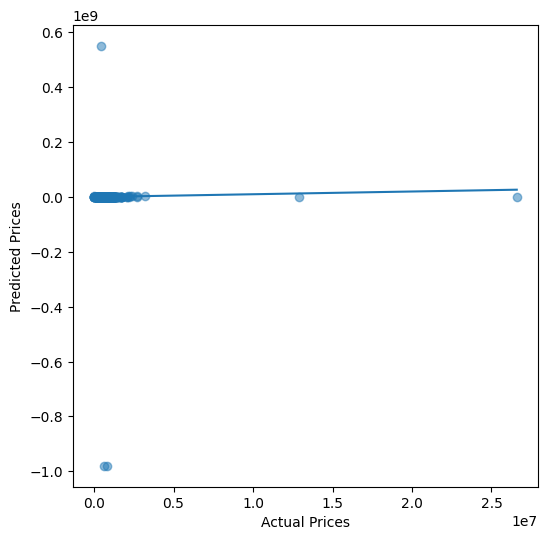

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  
plt.show()

In [35]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64